In [ ]:
import json

INPUT_FILE = "text_dataset.json" 

def print_unique_players():
    try:
        with open(INPUT_FILE, "r", encoding="utf-8") as f:
            data = json.load(f)
        
        # Use a set to automatically handle uniqueness
        unique_names = set()
        
        for article in data:
            for player in article.get("players", []):
                name = player.get("name", "").strip()
                if name:
                    unique_names.add(name)
        
        # Sort alphabetically for easier reading
        sorted_names = sorted(list(unique_names))
        
        print(f"--- Player List Audit ---")
        print(f"Total Unique Names Found: {len(sorted_names)}")
        print("-" * 30)
        
        for name in sorted_names:
            print(name)
            
    except FileNotFoundError:
        print(f"Error: Could not find {INPUT_FILE}.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    print_unique_players()

In [2]:
INPUT_FILE = "all_fantasy_textdata.json" 

def get_dates():
    try:
        with open(INPUT_FILE, "r", encoding="utf-8") as f:
            data = json.load(f)
        
        dates = []
        for article in data:
            date_str = article.get("meta_date", "").strip()
            if date_str:
                dates.append(date_str)
        
        # Sort them so they are chronological (optional but helpful)
        dates.sort()

        print(f"--- Article Dates Audit ---")
        print(f"Total Dates Found: {len(dates)}")
        print("-" * 30)
        
        for d in dates:
            print(d)

    except FileNotFoundError:
        print(f"Error: Could not find {INPUT_FILE}.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    get_dates()

--- Article Dates Audit ---
Total Dates Found: 505
------------------------------
2025-08-15 11:09:12
2025-08-15 11:13:00
2025-08-16 11:20:10
2025-08-16 11:20:19
2025-08-17 11:11:57
2025-08-17 11:12:04
2025-08-18 11:18:01
2025-08-18 11:18:04
2025-08-19 11:13:04
2025-08-19 11:13:42
2025-08-19 11:14:50
2025-08-19 11:15:34
2025-08-20 16:20:39
2025-08-21 17:29:35
2025-08-21 17:29:36
2025-08-22 11:26:22
2025-08-22 11:30:51
2025-08-23 11:12:53
2025-08-23 11:13:11
2025-08-23 11:13:34
2025-08-23 11:13:41
2025-08-23 11:13:49
2025-08-24 11:32:54
2025-08-24 11:34:20
2025-08-25 11:17:45
2025-08-25 11:18:18
2025-08-26 11:11:14
2025-08-27 11:07:40
2025-08-27 11:07:57
2025-08-28 11:22:04
2025-08-30 10:08:48
2025-08-30 11:28:02
2025-08-30 13:38:30
2025-08-31 11:17:17
2025-08-31 11:17:29
2025-09-01 11:26:46
2025-09-02 14:45:13
2025-09-03 13:22:21
2025-09-03 13:22:25
2025-09-03 18:05:49
2025-09-03T17:17:55+00:00
2025-09-04 11:24:42
2025-09-04 11:24:58
2025-09-04 13:29:50
2025-09-04 17:09:24
2025-09-04T1

In [6]:
import json
import re

# --- CONFIGURATION ---
INPUT_FILE = "data_cleaning/text_dataset.json" 

def audit_titles():
    try:
        with open(INPUT_FILE, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # Regex to find "Week 1", "Week 14", "Week 5", etc.
        # Case insensitive to catch "WEEK 5" or "week 5"
        week_pattern = re.compile(r'Week\s+(\d+)', re.IGNORECASE)
        
        has_week_count = 0
        no_week_count = 0
        no_week_examples = []
        
        for article in data:
            title = article.get("meta_title", "")
            match = week_pattern.search(title)
            
            if match:
                has_week_count += 1
            else:
                no_week_count += 1
                # Collect first 20 examples to inspect
                if len(no_week_examples) < 20:
                    no_week_examples.append(title)
                    
        print("-" * 30)
        print("TITLE AUDIT RESULTS")
        print("-" * 30)
        print(f"Total Articles:             {len(data)}")
        print(f"Titles specifying 'Week X': {has_week_count} ({(has_week_count/len(data))*100:.1f}%)")
        print(f"Titles missing 'Week X':    {no_week_count}")
        print("-" * 30)
        print("Examples of titles missing week info (Will use Date Fallback):")
        for ex in no_week_examples:
            print(f" - {ex}")

    except FileNotFoundError:
        print(f"Error: Could not find {INPUT_FILE}.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    audit_titles()

------------------------------
TITLE AUDIT RESULTS
------------------------------
Total Articles:             505
Titles specifying 'Week X': 381 (75.4%)
Titles missing 'Week X':    124
------------------------------
Examples of titles missing week info (Will use Date Fallback):
 - Fantasy Football Advice from the Most Accurate Experts
 - Fantasy Football Injuries to Know for Waiver Wire Pickups
 - Fantasy Football Waiver Wire Pickups: Wide Receivers & Tight Ends
 - Fantasy Football Injuries to Know for Waiver Wire Pickups
 - Fantasy Football Streamers & Waiver Wire Pickups: Tight Ends
 - Fantasy Football Waiver Wire Pickups: Wide Receivers & Tight Ends
 - Fantasy Football Heat Index: Buy or Sell Surprise Performances
 - Patrick Mahomes Injury: Fantasy Football Waiver Wire Pickups
 - Davante Adams Injury: Fantasy Football Waiver Wire Pickups
 - Fantasy Football Injuries to Know for Waiver Wire Pickups
 - Fantasy Football Streamers & Waiver Wire Pickups: Tight Ends
 - Fantasy Football W

In [7]:
import json

# --- CONFIGURATION ---
INPUT_FILE = "data_cleaning/text_dataset.json" 
OUTPUT_FILE = "data_cleaning/text_dataset.json" 

def remove_draft_articles():
    try:
        print(f"Reading from {INPUT_FILE}...")
        with open(INPUT_FILE, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        initial_count = len(data)
        cleaned_data = []
        removed_count = 0
        
        for article in data:
            title = article.get("meta_title", "")
            
            # Check for "draft" (case-insensitive)
            if "draft" in title.lower():
                removed_count += 1
                continue
            
            cleaned_data.append(article)
            
        # Save the filtered data
        with open(OUTPUT_FILE, 'w', encoding='utf-8') as f:
            json.dump(cleaned_data, f, indent=4, ensure_ascii=False)
            
        print("-" * 30)
        print("Filter Complete.")
        print(f"Total Articles Processed: {initial_count}")
        print(f"Articles Removed ('Draft'): {removed_count}")
        print(f"Articles Remaining:       {len(cleaned_data)}")
        print(f"Saved to:                 {OUTPUT_FILE}")
        print("-" * 30)

    except FileNotFoundError:
        print(f"Error: Could not find {INPUT_FILE}.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    remove_draft_articles()

Reading from data_cleaning/text_dataset.json...
------------------------------
Filter Complete.
Total Articles Processed: 505
Articles Removed ('Draft'): 21
Articles Remaining:       484
Saved to:                 data_cleaning/text_dataset.json
------------------------------


In [1]:
!pip install pandas matplotlib seaborn numpy


[notice] A new release of pip is available: 24.1.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


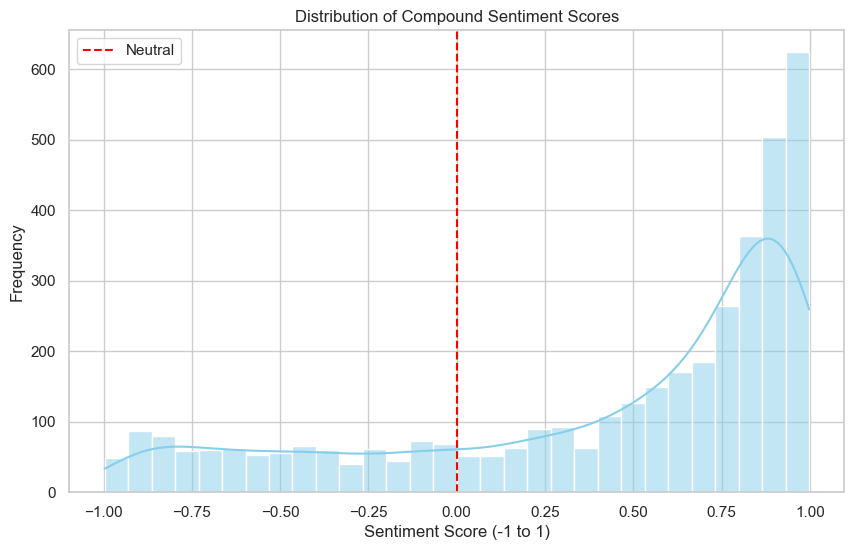

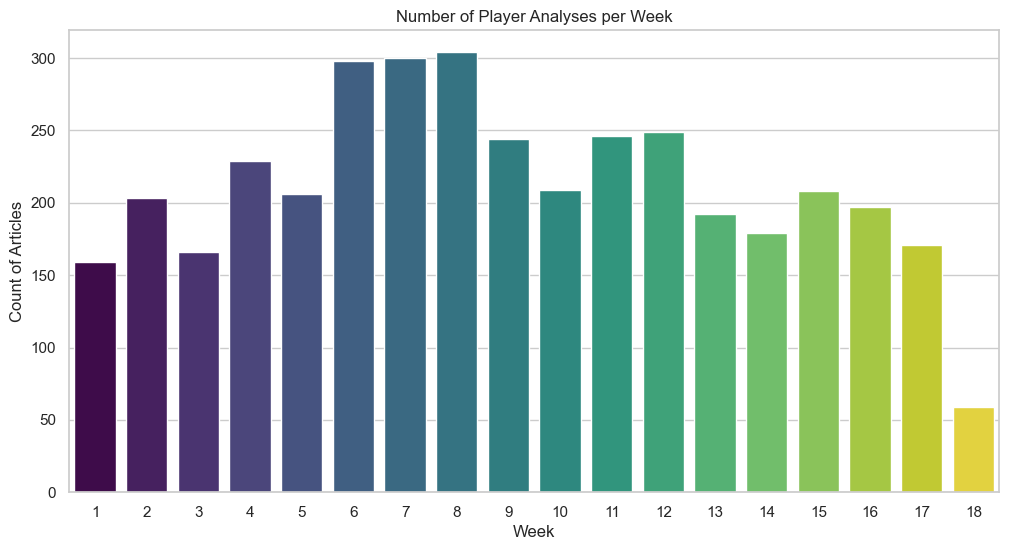

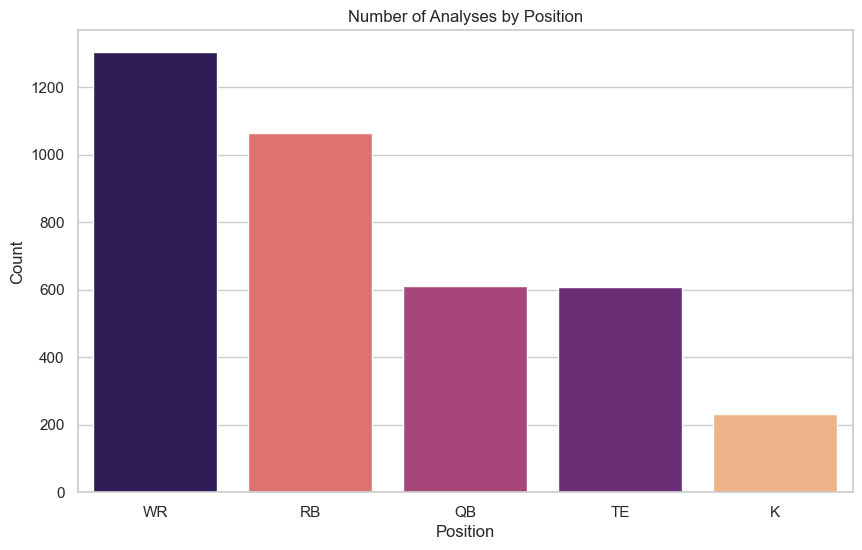

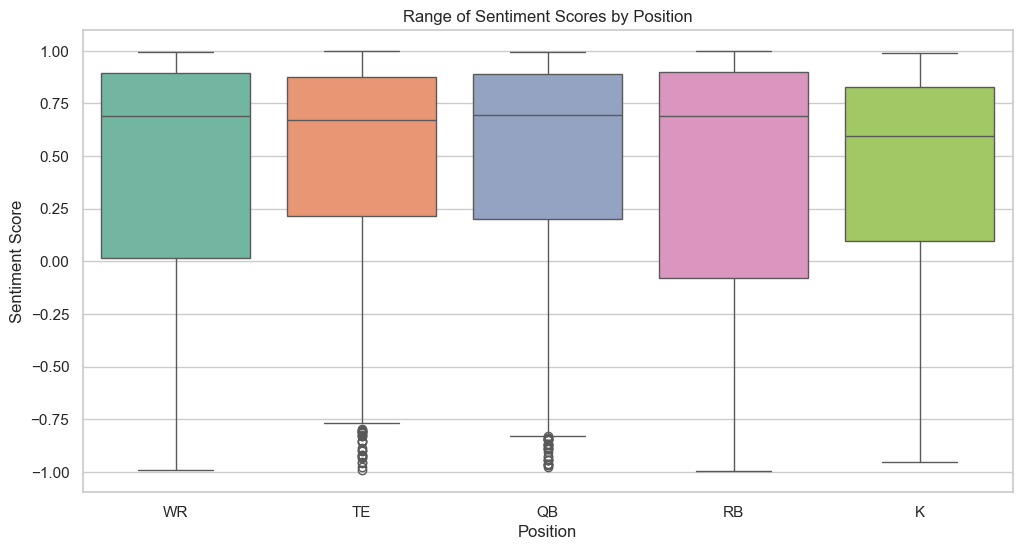

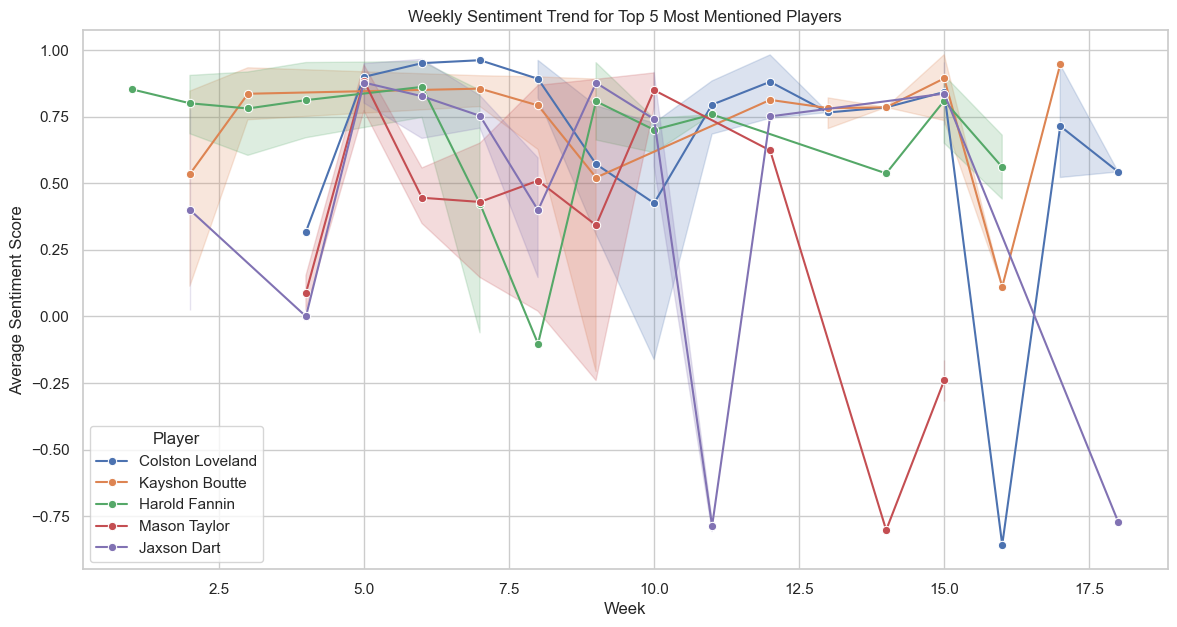

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load the Data
# ---------------------------------------------------------
df = pd.read_csv('dataset/fantasy_dataset.csv')

# Drop rows where we don't have fantasy points (for correlation plots)
df_clean = df.dropna(subset=['TotalPoints'])

# Set plot style for better aesthetics
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ---------------------------------------------------------
# Plot 1: Distribution of Sentiment Scores
# Goal: See if analysts are generally positive, negative, or neutral.
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_compound'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Sentiment Score (-1 to 1)')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='Neutral')
plt.legend()
plt.show()

# ---------------------------------------------------------
# Plot 2: Count of Analyses by Week
# Goal: Check if coverage volume changes throughout the season.
# ---------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='week', palette='viridis', hue='week', legend=False)
plt.title('Number of Player Analyses per Week')
plt.xlabel('Week')
plt.ylabel('Count of Articles')
plt.show()

# ---------------------------------------------------------
# Plot 3: Count of Analyses by Position
# Goal: See which positions get the most media attention.
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='position', order=df['position'].value_counts().index, palette='magma', hue='position', legend=False)
plt.title('Number of Analyses by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

# ---------------------------------------------------------
# Plot 5: Sentiment Distribution by Position (Box Plot)
# Goal: Are analysts biased toward certain positions (e.g., do they hype QBs more than TEs?)
# ---------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='position', y='sentiment_compound', palette='Set2', hue='position', legend=False)
plt.title('Range of Sentiment Scores by Position')
plt.xlabel('Position')
plt.ylabel('Sentiment Score')
plt.show()

plt.figure(figsize=(14, 7))
# Filter data for these players
top_players_df = df[df['player_name'].isin(top_players)]

sns.lineplot(data=top_players_df, x='week', y='sentiment_compound', hue='player_name', marker='o')
plt.title('Weekly Sentiment Trend for Top 5 Most Mentioned Players')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Score')
plt.legend(title='Player')
plt.show()